In [70]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [71]:
df = pd.read_csv("./data/perceptron_toydata-truncated.txt", sep="\t")
df.head()

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0


In [72]:
x_train = df[["x1", "x2"]].values
y_train = df.label.values

In [73]:
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).float()

x_train.size(), x_train.dtype, y_train.size(), y_train.dtype

(torch.Size([20, 2]), torch.float32, torch.Size([20]), torch.float32)

In [74]:
class TensorPerceptron:
    def __init__(self, num_features: int) -> None:
        self.num_features = num_features
        self.weights = torch.zeros(num_features)
        self.bias = torch.tensor(0.0)

    def __call__(self, x: torch.Tensor) -> torch.Tensor:
        return self._forward(x)

    def __str__(self) -> str:
        return f"Perceptron\nWeights: {self.weights}\nBias: {self.bias}"

    def _forward(self, x: torch.Tensor):
        weighted_sum_z = x.matmul(self.weights) + self.bias
        predictions = torch.where(weighted_sum_z > 0.0, 1., 0.)

        return predictions

    def _update(self, x: torch.Tensor, y_true: torch.Tensor):
        y_hat = self(x)
        error = y_true - y_hat

        self.bias += error
        self.weights += error * x

        return error

    def fit(self, x: torch.Tensor, labels: torch.Tensor, num_epochs: int):
        loss = []
        for epoch in range(num_epochs):
            error_count = torch.tensor(.0)

            for _x, _y in zip(x, labels):
                error = self._update(_x, _y)
                error_count += torch.abs(error)

            print(f"Epoch: {epoch + 1} => Errors: {error_count}")
            loss.append(error_count.item())

        return loss

    def summary(self):
        print(self, "\n")

In [75]:
model = TensorPerceptron(num_features=2)
model.summary()

Perceptron
Weights: tensor([0., 0.])
Bias: 0.0 



In [76]:
num_epochs = 10
loss = model.fit(x_train, y_train, num_epochs=num_epochs)
model.summary()

Epoch: 1 => Errors: 1.0
Epoch: 2 => Errors: 3.0
Epoch: 3 => Errors: 1.0
Epoch: 4 => Errors: 0.0
Epoch: 5 => Errors: 0.0
Epoch: 6 => Errors: 0.0
Epoch: 7 => Errors: 0.0
Epoch: 8 => Errors: 0.0
Epoch: 9 => Errors: 0.0
Epoch: 10 => Errors: 0.0
Perceptron
Weights: tensor([2.8600, 1.9800])
Bias: -3.0 



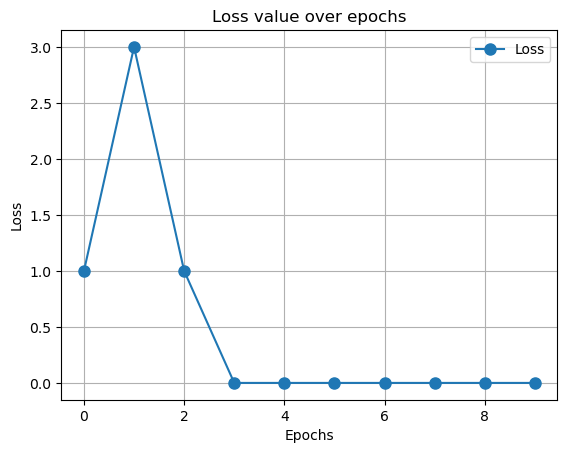

In [86]:
x_epochs = list(range(num_epochs))
l

plt.plot(x_epochs, loss, label="Loss", marker="o", markersize="8")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss value over epochs")
plt.legend(loc="upper right")
plt.grid()

In [78]:
X_data = torch.tensor([[-1.0, -2.0], [-3.0, 4.5], [5.0, 6.0]])

model(X_data)

tensor([0., 0., 1.])

In [79]:
def plot_boundary(net: TensorPerceptron):
    w1, w2 = model.weights[0], model.weights[1]
    b = net.bias

    x1_min = -20
    x2_min = (-(x1_min * w1) - b) / w2

    x1_max = 20
    x2_max = (-(x1_max * w1) - b) / w2

    return x1_min, x1_max, x2_min, x2_max

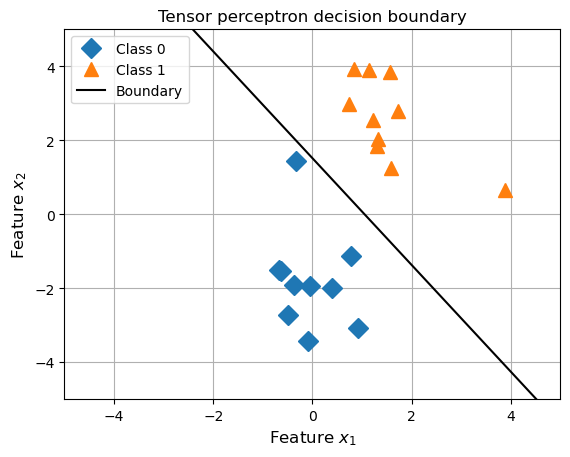

In [80]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(net=model)

plt.plot(
    x_train[y_train == 0, 0],
    x_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    label="Class 0",
    linestyle="",
)

plt.plot(
    x_train[y_train == 1, 0],
    x_train[y_train == 1, 1],
    marker="^",
    markersize=10,
    label="Class 1",
    linestyle="",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k", label="Boundary")

plt.legend(loc=2)
plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.title("Tensor perceptron decision boundary")
plt.show()